In [1]:
#import time
#start= time.time()

In [1]:
import os
import h5py as h5
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.misc import imshow
#Classifiers dependencies
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import cv2
from PIL import Image
import math
#entropy
from skimage.feature import greycomatrix
#for energy
from pywt import dwt2
import sys

ImportError: cannot import name 'imshow' from 'scipy.misc' (C:\Users\Invincible\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [ ]:
class Patient(object):
    PID = ""
    image=""
    label=""
    tumorBorder=""
    tumorMask=""
    
    def __init__(self, PID, image, label,tumorBorder,tumorMask):
        self.PID = PID
        self.image = image
        self.label = label
        self.tumorBorder=tumorBorder
        self.tumorMask=tumorMask

In [ ]:
path = 'C:\\Users\\Invincible\\Desktop\\RAKESH\\Project\\Project1\\1512427\\brainTumorDataPublic_1-766\\*.mat'   
files=glob.glob(path)

In [ ]:
df = pd.DataFrame(columns=[])
for file in files:
    f=h5.File(file,'r')
    list(f.items())
    list(f['/cjdata'].keys())
    p=Patient('','','','','')
    p.image=np.mat(f['/cjdata/image'])
    p.PID=np.array(f['/cjdata/PID'])
    p.label=np.array(f['/cjdata/label'])
    p.tumorBorder=np.mat(f['/cjdata/tumorBorder'])
    p.tumorMask=np.mat(f['/cjdata/tumorMask'])
    
    img=p.image
    img1=p.tumorMask
    #print(plt.imshow(img))  #to get image
    #print(plt.imshow(img1)) 
   
    a=img1.std()   #Standard Deviation
    b=img1.mean()  #mean
    c=image.var()   #variance
    d=p.label
    
    glcm = np.squeeze(greycomatrix(img1, distances=[1], 
                               angles=[0], symmetric=True, 
                               normed=True))
    f = -np.sum(glcm*np.log2(glcm + (glcm==0)))#Entropy
    
    _, (cH, cV, cD) = dwt2(img1.T, 'db1')
    g= (cH**2 + cV**2 + cD**2).sum()/img1.size#Energy
    
    df = df.append({'Mean': b,'Standard Deviation': a, 'variance':c, 'Entropy': f, 'Energy':g}, ignore_index=True)

In [2]:
df
#print(plt.imshow(img)) 

NameError: name 'df' is not defined

In [6]:
#print(plt.imshow(img1))

In [7]:
#df.fillna(0)             #filling missing value using fillna()
#df

In [8]:
df1=df

In [9]:
#df.skew()

In [10]:
#df.kurtosis()

In [11]:
#df.corr()

In [12]:
#cm = df.corr()
#sns.heatmap(cm, annot=True, yticklabels=df.columns, xticklabels=df.columns)

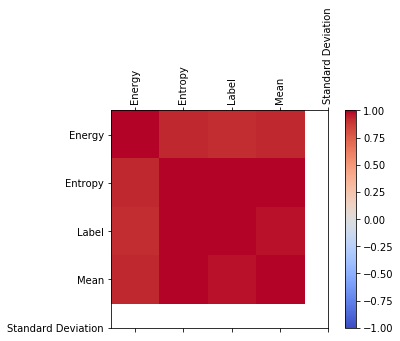

In [13]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [15]:
df1 = df1.drop('Label',axis=1)
df_x=df1.iloc[:,0:7]
df_y=df.iloc[:,2:3]
df_y=df_y.astype('int') #change the label datatype to  integer type

In [16]:
x_train, x_test, y_train, y_test= train_test_split(df_x,df_y,test_size=.2,random_state=4)

In [17]:
# MODELS

In [18]:
#nn=svm.SVC(gamma=0.001, C=100)                         #SVM                   acc=90.04%

#nn=tree.DecisionTreeClassifier()                      #decision tree         acc=84%

#nn = GaussianNB()                                      #naive bayes           acc 85.57

#nn= RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)   #Random forest      acc=88.06%

#nn= KNeighborsClassifier(n_neighbors=3)                  #KNN                  acc= 88.55%

#nn.fit(x_train,y_train)

nn=MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(100,150),random_state=1,max_iter=2000) #MLP acc=90.04%
nn.fit(x_train,y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [19]:
nn.score(x_test,y_test)

0.5725938009787929

In [20]:
#end= time.time()
#print(end-start)

NameError: name 'time' is not defined

In [ ]:
test=x_test.iloc[1]
test.Energy=.5
test.Entropy=.5
test['Standard Deviation']=.5
test.Mean=.5
test=[test]

In [ ]:
nn.predict(test)